# Analysis of custom filters

## Aim of this notebook

Analyzing the pre-filtered fragment library, the reduced fragment library and the custom filtered fragment library.


## Table of contents
1. Load the fragment libraries

    1.1. Load fragment library pre-filtered
    
    1.2. Load fragment library reduced
    
    1.3. Load fragment library custom filtered
    
    1.4. Check which fragments from are contained in the subsets
    

2. t-SNE plots
    
    2.1. Comparing fragment library sets
    * Fragment library pre-filtered vs. fragment library reduced
    * Fragment library pre-filtered vs. fragment library custom filtered
    * Fragment library pre-filtered vs. fragment library reduced vs. custom filtered
    
    
    2.2. Comparing single custom filtering steps



3. Most common fragments per library subset

    3.1. Fragment library pre-filtered

    3.2. Fragment library reduced
    
    3.3. Fragment library custom filtered

    3.4. Compare cluster sizes for all subsets
    
    3.5. Compare most common fragments in complete fragment library with most specific fragments in custom fragment library



4. Connection frequency between subpockets

    4.1. Fragment library pre-filtered
    
    4.2. Fragment library reduced
    
    4.3. Fragment library custom filtered
    

5. Fragment similarity per subpocket


6. Fragment properties

    6.1. For each library subset

    6.2. For every custom filter step

7. Development of number of fragments per subpocket during custom filtering

## Imports and preprocessing

In [1]:
from pathlib import Path

import pandas as pd
from rdkit.Chem import PandasTools

from kinfraglib import filters, utils

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Needed to display ROMol images in DataFrames
PandasTools.RenderImagesInAllDataFrames(images=True)

### Define global paths

**Note:** If you want to run this analysis for your own created custom fragment library please adapt `PATH_DATA_CUSTOM` to the folder containing your custom fragment library, e.g. `PATH_DATA_CUSTOM = PATH_DATA / "fragment_library_custom_filtered/YYYY-MM-DD_HH-MM-SS`"

In [4]:
# Path to data
HERE = Path().resolve()
PATH_DATA = HERE / "../../data"
PATH_DATA_CUSTOM = PATH_DATA / "fragment_library_custom_filtered"

## 1. Load the fragment libraries
*  1.1. Load fragment library pre-filtered
*  1.2. Load fragment library reduced
*  1.3. Load fragment library custom filtered
*  1.4. Check which fragments from are contained in the subsets

**Pre-filtered fragment library:** Fragment library without duplicates, unfragmented ligands, fragments only connecting to pool X and fragments in pool X. `fragment_library`

**Reduced fragment library:** Pre-filtered fragment library, without AP fragments which are not hinge like and chose a diverse subset using Butina Clustering. `fragment_library_reduced`

**Custom fragment library:** Pre-filtered fragment library excluding fragments filtered out by unwanted substructures, drug likeness, synthesizability and pairwise retrosynthesizability. `fragment_library_custom_filtered`

### 1.1. Load fragment library pre-filtered
Fragment library without duplicates, unfragmented ligands, fragments only connecting to pool X and fragments in pool X.

In [5]:
fragment_library_orig = utils.read_fragment_library(PATH_DATA / "fragment_library")
fragment_library = filters.prefilters.pre_filters(fragment_library_orig)
pd.concat(fragment_library).shape

(2862, 18)

,subpocket,smiles,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles_dummy,fragment_count,connections,connections_name
0,AP,Nc1c[nH]c2ncccc12,,,,AAK1,NAK,Other,5l4q,LKB,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,[11*]c1cnc2[nH]cc(N[27*])c2c1,3,"[FP, SE]","[AP=FP, AP=SE]"
1,AP,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,,,,AAK1,NAK,Other,5te0,XIN,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,3,"[SE, GA]","[AP=SE, AP=GA]"
2,AP,Cc1cc(N)[nH]n1,,,,ABL1,Abl,TK,2f4j,VX6,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP SE,5 5 14 14 14 14 14 14 14 8 8 8 8 na,[22*]Nc1cc(C)n[nH]1,9,[SE],[AP=SE]

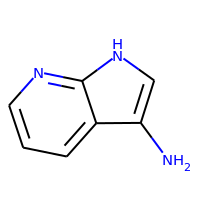
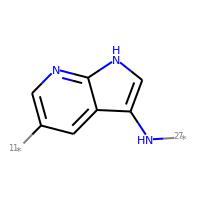
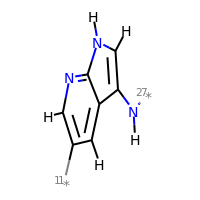
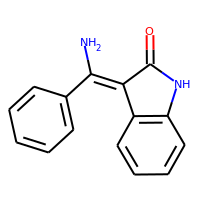
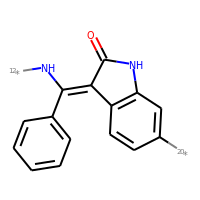
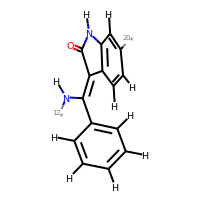
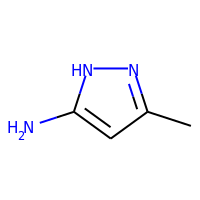
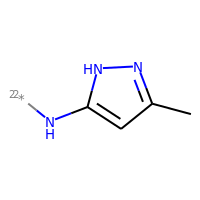
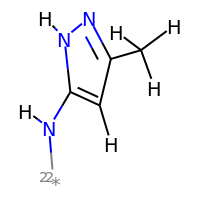

In [6]:
fragment_library['AP'].head(3)

### 1.2. Load fragment library reduced
Pre-filtered fragment library, without AP fragments which are not hinge like and chose a diverse subset using Butina Clustering.

In [7]:
fragment_library_reduced = utils.read_fragment_library(PATH_DATA / "fragment_library_reduced")
pd.concat(fragment_library_reduced).shape

(624, 15)

,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,AKT2,Akt,AGC,3e87,G95,B,B,AP AP AP AP AP AP AP AP AP AP AP AP AP AP FP,16 16 16 16 16 16 16 16 16 16 16 16 16 16 na,c1cnc2[nH]ccc2c1,*c1ccnc2[nH]ccc12,AP
1,,,,AKT1,Akt,AGC,3ocb,XM1,,B,AP AP AP AP AP AP AP AP AP AP AP AP AP FP,14 14 14 14 14 14 14 14 14 14 14 14 14 na,c1ncc2cc[nH]c2n1,*c1ncnc2[nH]ccc12,AP
2,,,,JAK1,JakA,TK,4e4l,0NH,A,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 na,c1cc2c(ncc3nc[nH]c32)[nH]1,*n1cnc2cnc3[nH]ccc3c21,AP

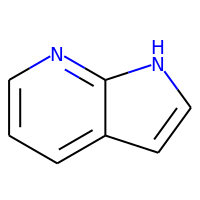
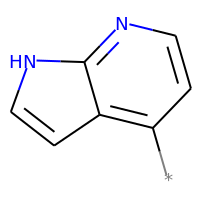
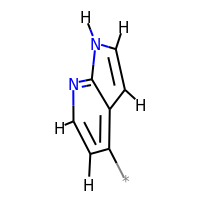
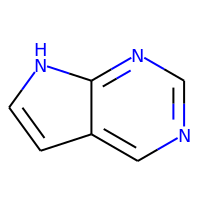
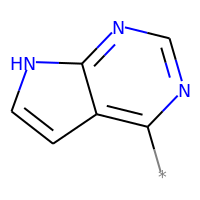
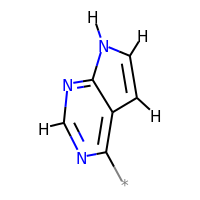
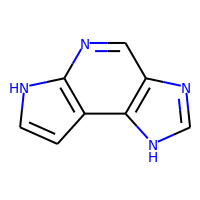
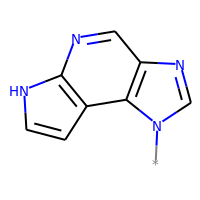
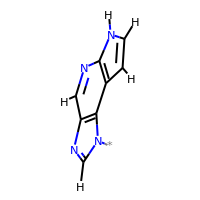

In [8]:
fragment_library_reduced['AP'].head(3)

### 1.3. Load fragment library custom filtered
Pre-filtered fragment library excluding fragments filtered out by unwanted substructures, drug likeness, synthesizability and pairwise retrosynthesizability.

In [9]:
fragment_library_custom = utils.read_fragment_library(PATH_DATA / "fragment_library_custom_filtered")
pd.concat(fragment_library_custom).shape

(607, 15)

,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,AAK1,NAK,Other,5l4q,LKB,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,Nc1c[nH]c2ncccc12,*Nc1c[nH]c2ncc(*)cc12,AP
1,,,,ACTR2,STKR,TKL,3q4t,TAK,A,B,AP AP AP AP AP AP AP AP AP AP AP AP SE GA,16 16 16 16 16 16 16 16 16 16 16 16 na na,c1cnc2ccnn2c1,*c1cnc2c(*)cnn2c1,AP
2,,,,ACTR2,STKR,TKL,3soc,GVD,A,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,15 15 15 15 15 15 15 15 14 14 14 14 14 14 14 5...,Nc1cc(C2CC2)[nH]n1,*Nc1cc(C2CC2)[nH]n1,AP

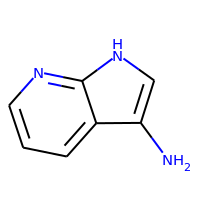
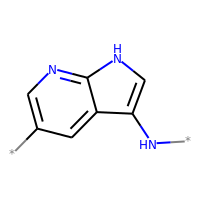
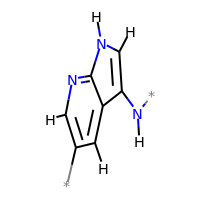
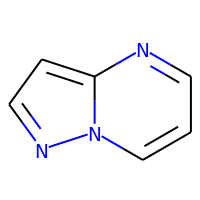
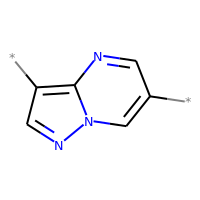
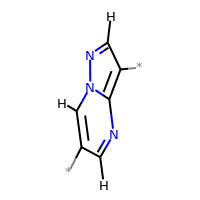
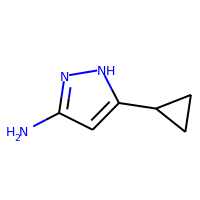
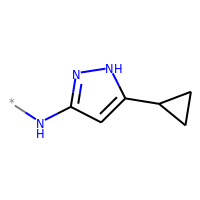
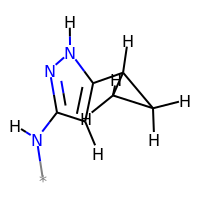

In [10]:
fragment_library_custom['AP'].head(3)

### 1.4. Check which fragments from are contained in the subsets

In [11]:
fragment_library = filters.analysis.frag_in_subset(fragment_library, fragment_library_reduced, colname = "bool_reduced")

In [12]:
fragment_library = filters.analysis.frag_in_subset(fragment_library, fragment_library_custom, colname = "bool_custom")

,subpocket,smiles,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles_dummy,fragment_count,connections,connections_name,bool_reduced,bool_custom
0,AP,Nc1c[nH]c2ncccc12,,,,AAK1,NAK,Other,5l4q,LKB,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,[11*]c1cnc2[nH]cc(N[27*])c2c1,3,"[FP, SE]","[AP=FP, AP=SE]",0,1
1,AP,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,,,,AAK1,NAK,Other,5te0,XIN,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,3,"[SE, GA]","[AP=SE, AP=GA]",0,0
2,AP,Cc1cc(N)[nH]n1,,,,ABL1,Abl,TK,2f4j,VX6,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP SE,5 5 14 14 14 14 14 14 14 8 8 8 8 na,[22*]Nc1cc(C)n[nH]1,9,[SE],[AP=SE],1,0

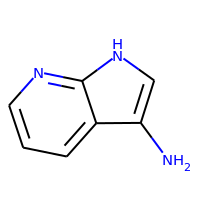
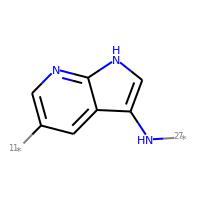
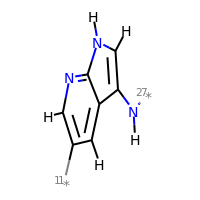
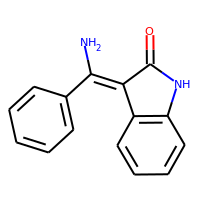
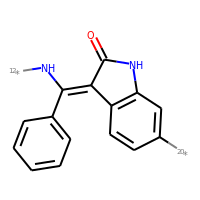
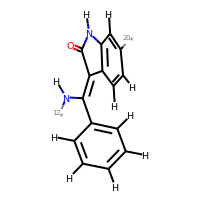
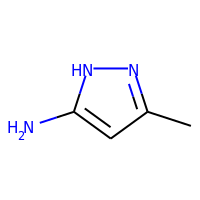
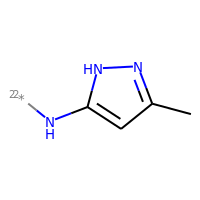
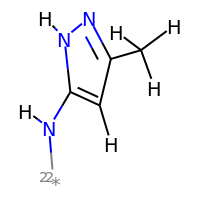

In [13]:
fragment_library["AP"].head(3)

Number of fragments in each subpocket for the three subsets.

In [14]:
num_fragments = pd.concat(
    [
        filters.analysis.count_fragments(fragment_library, "pre-filtered"),
        filters.analysis.count_fragments(fragment_library_reduced, "reduced"),
        filters.analysis.count_fragments(fragment_library_custom, "custom"),
    ],
    axis=1,
)
num_fragments.append(num_fragments.sum().rename("Total"))

,pre-filtered,reduced,custom
subpocket,,,
AP,1001,145,179
FP,864,192,156
SE,607,140,150
GA,306,93,96
B1,42,24,8
B2,42,30,18
Total,2862,624,607


## 2. t-SNE plots
* 2.1. Comparing fragment library sets
        - Fragment library pre-filtered vs. fragment library reduced
        - Fragment library pre-filtered vs. fragment library custom filtered
        - Fragment library pre-filtered vs. fragment library reduced vs. custom filtered
    
* 2.2. Comparing single custom filtering steps

T-Distributed Stochastic Neighbor Embedding (t-SNE) plots can be used to visualize high dimensional data in a low dimensional space, showing clusters. 

We will use them to compare the included and excluded fragments in the fragment libraries and the filtering steps

### 2.1. Comparing fragment library sets

/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


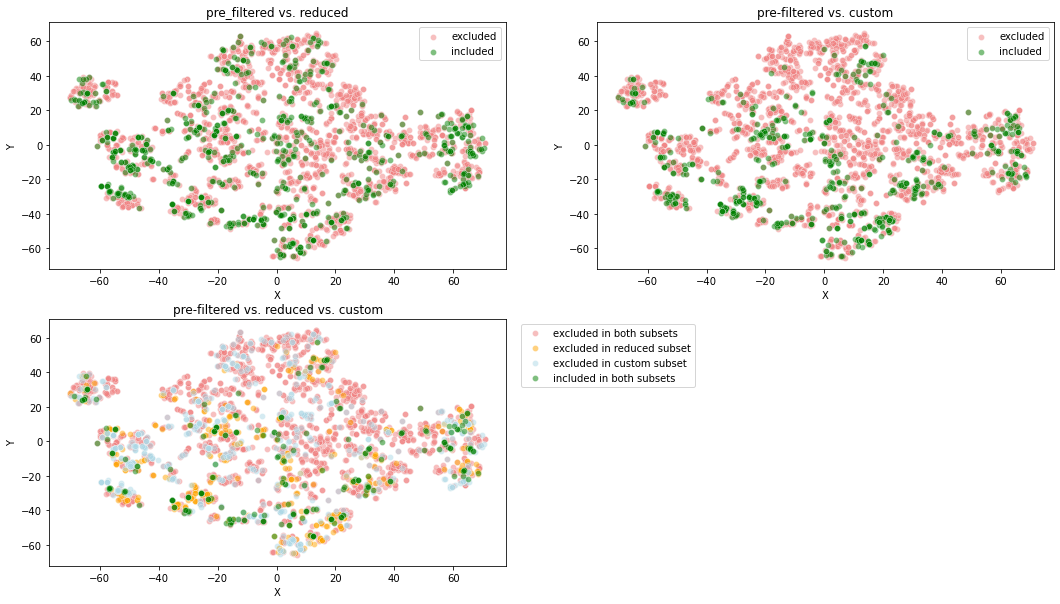

2862 Pre-filtered fragments.
        Number of fragments excluded in both datasets: 1715
        Number of fragments excluded in the reduced dataset but included in the custom dataset: 370
        Number of fragments excluded in the custom dataset but included in the reduced dataset: 540
        Number of fragments in both datasets: 237 


In [15]:
tsne_df = filters.plots.create_tsne_plots(fragment_library)

`tsne_df`: Dataframe containing the positions in the t-SNE-plot, booleans/integer if they are contained in a subset and the SMILES string of the fragment.
- `x` and `Y`
    - fragments positions calculated by the t-SNE method.
    
- `reduced`
    - boolean values if fragment is contained in the reduced subset
    
- `custom`
    - boolean values if fragment is contained in the custom subset
    
- `compare`
    - integer specifying  in which subset(s) the fragments are
        - 0: Excluded in both subsets
        - 1: Excluded in reduced subset; included in custom subset
        - 2: Excluded in custom subset; included in reduced subset
        - 3: Included in both subsets

Inspect molecules shown in t-SNE plots

In [16]:
tsne_df.head()

,X,Y,reduced,custom,compare,smiles
0,40.521877,-12.691333,0,1,1,Nc1c[nH]c2ncccc12
1,8.322818,7.539809,0,0,0,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1
2,37.233833,5.845155,1,0,2,Cc1cc(N)[nH]n1
3,28.313137,-5.556259,0,0,0,Nc1ncc(C=O)s1
4,33.207409,12.782182,0,0,0,COCC(=O)n1cc2[nH]nc(NC=O)c2c1


### 2.2 Comparing single custom filtering steps

Read in file where single filtering step results are saved.

In [17]:
saved_filter_results = pd.read_csv(PATH_DATA_CUSTOM / "custom_filter_results.csv")
saved_filter_results.head()

,smiles,subpocket,bool_pains,bool_brenk,bool_ro3,bool_qed,qed,bool_bb,bool_syba,syba,retro_count,bool_retro
0,Nc1c[nH]c2ncccc12,AP,1,1,1,1,0.565900,1,1,30.950959,0.0,0.0
1,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,AP,1,0,1,1,0.747185,0,1,17.682659,NaN,NaN
2,Cc1cc(N)[nH]n1,AP,1,1,1,0,0.488854,1,1,15.727015,NaN,NaN
3,Nc1ncc(C=O)s1,AP,1,0,1,1,0.561340,1,1,12.789242,NaN,NaN
4,COCC(=O)n1cc2[nH]nc(NC=O)c2c1,AP,1,0,0,1,0.723961,0,1,14.653939,NaN,NaN


[describe tsne plots]

/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


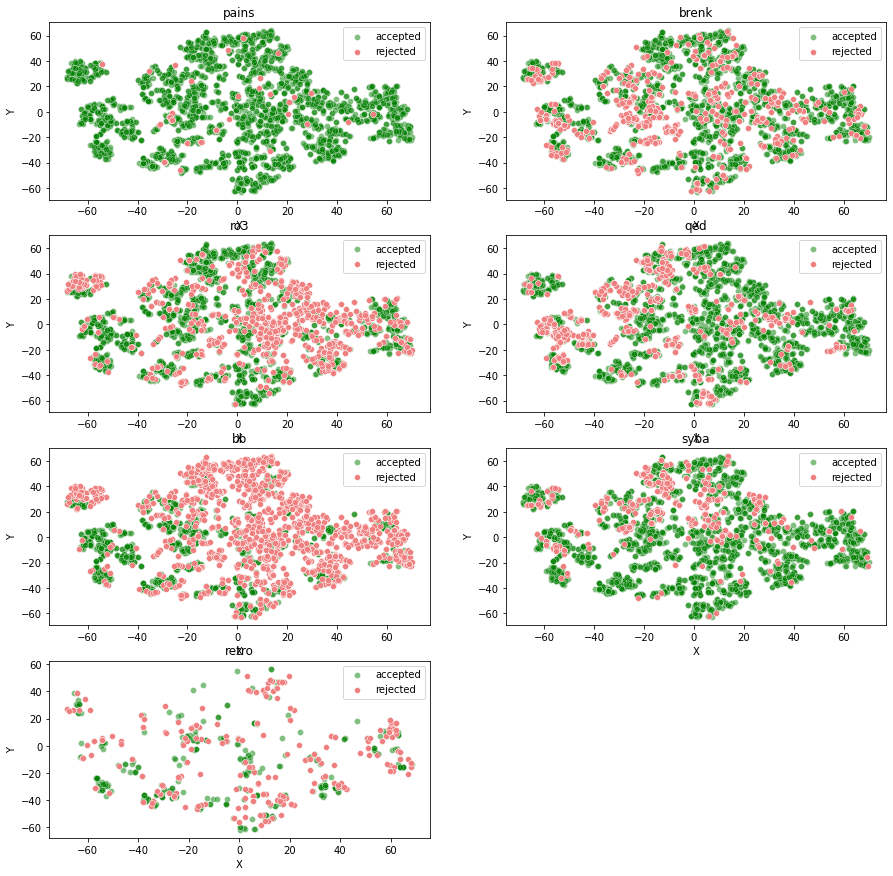

In [18]:
tsne_df_filters = filters.plots.create_tsne_plots_filters(fragment_library, saved_filter_results)

## 3. Fragment subpocket specificity

Cluster the fragments contained in the complete subset and adding in which subpockets the clustered fragments are found, to check which fragments only occour in one subpocket and are more subpocket specific and which are less specific and occour in all subpockets.

* 3.1. Fragment library pre-filtered
* 3.2. Fragment library reduced
* 3.3. Fragment library custom filtered
* 3.4. Compare cluster sizes for all subsets
* 3.5. Compare most common fragments in complete fragment library with most specific fragments in custom fragment library

### 3.1. Fragment library pre-filtered

In [19]:
clustered_fragments = filters.analysis.cluster_fragment_library(fragment_library)

Number of molecules: 2862
Threshold:  0.6
Number of clusters:  453
# Clusters with only 1 molecule:  197
# Clusters with more than 5 molecules:  105
# Clusters with more than 25 molecules:  24
# Clusters with more than 100 molecules:  4


Legend: cluster ID | fragment count


/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  warnings.warn(


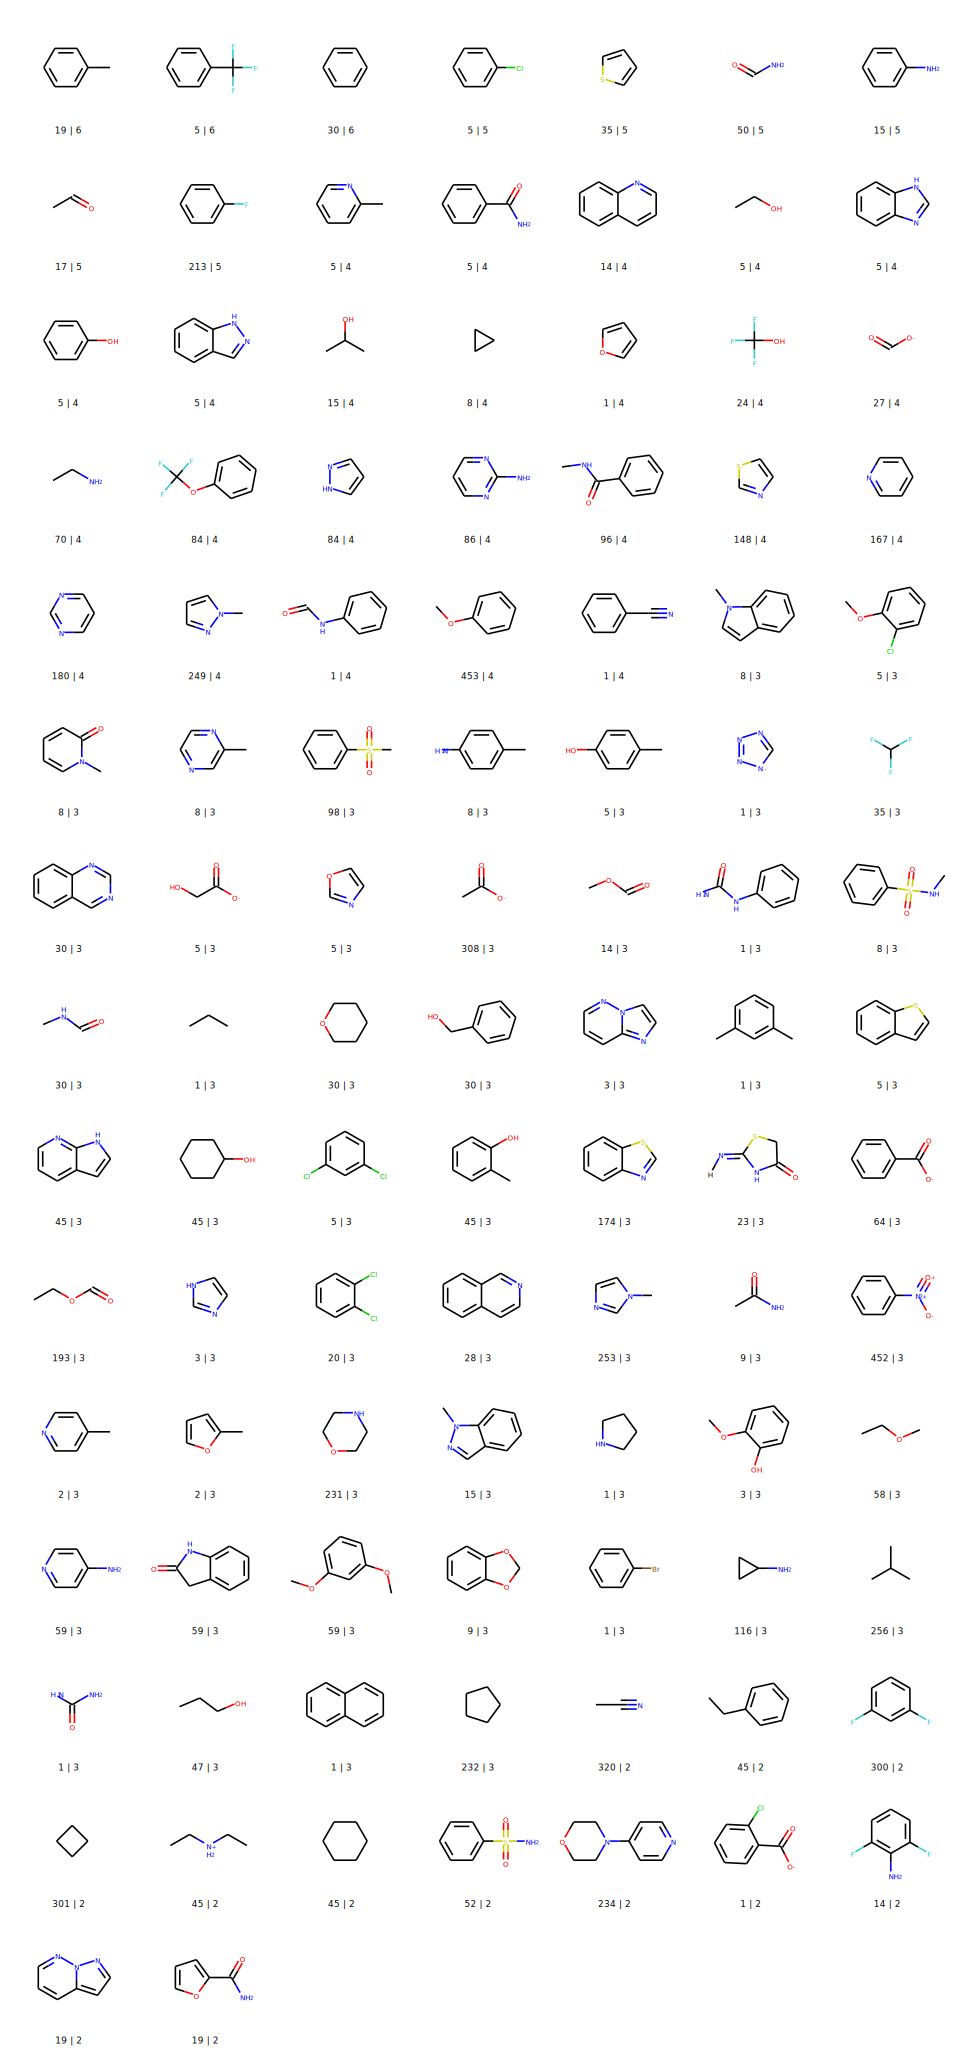

In [20]:
filters.plots.draw_clusters(clustered_fragments)

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
0,17,c1ccoc1,4,,1,2,"[FP, SE, GA, B2]"
1,19,O=CNc1ccccc1,4,,1,3,"[AP, FP, SE, GA]"
2,26,N#Cc1ccccc1,4,,1,4,"[AP, FP, SE, GA]"

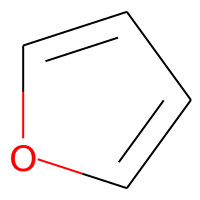
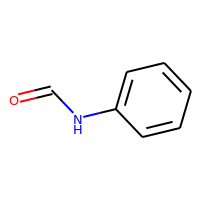
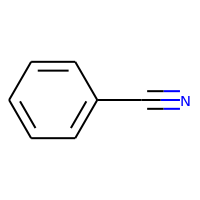

In [21]:
clustered_fragments.head(3)

Are there fragments appearing in all 6 subpockets (not subpocket specific)?

In [22]:
clustered_fragments[clustered_fragments ["fragment_count"]==6].shape

(3, 7)

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
446,0,FC(F)(F)c1ccccc1,6,,5,2,"[AP, FP, SE, GA, B1, B2]"
1025,1,Cc1ccccc1,6,,19,2,"[AP, FP, SE, GA, B1, B2]"
1258,2,c1ccccc1,6,,30,2,"[AP, FP, SE, GA, B1, B2]"

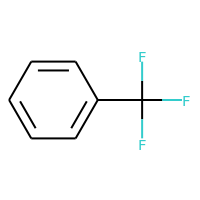
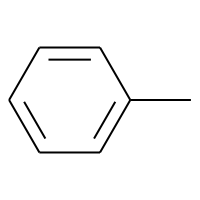
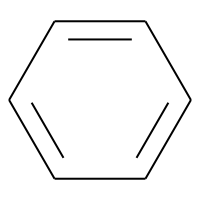

In [23]:
clustered_fragments[clustered_fragments ["fragment_count"]==6].head(3)

Are there fragments appearing only in one subpocket (subpocket specific)?

In [24]:
clustered_fragments[clustered_fragments["fragment_count"]==1].shape

(2289, 7)

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
18,228,C[C@H]1CCCC[N@H+]1Cc1cccc(Cl)c1F,1,,1,20,[FP]
19,233,CN[C@H]1C[C@@H](NS(C)(=O)=O)C1,1,,1,21,[FP]
20,234,O=C1NC(=O)c2c1ccc1[nH]c3ccc(O)cc3c21,1,,1,22,[AP]

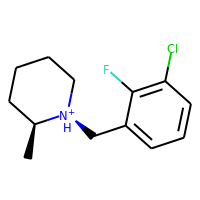
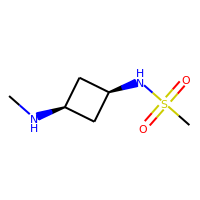
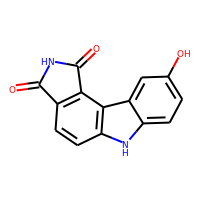

In [25]:
clustered_fragments[clustered_fragments["fragment_count"]==1].head(3)

### 3.2. Fragment library reduced

In [26]:
clustered_fragments_reduced = filters.analysis.cluster_fragment_library(fragment_library_reduced)

Number of molecules: 624
Threshold:  0.6
Number of clusters:  262
# Clusters with only 1 molecule:  168
# Clusters with more than 5 molecules:  24
# Clusters with more than 25 molecules:  0
# Clusters with more than 100 molecules:  0


Legend: cluster ID | fragment count


/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  warnings.warn(


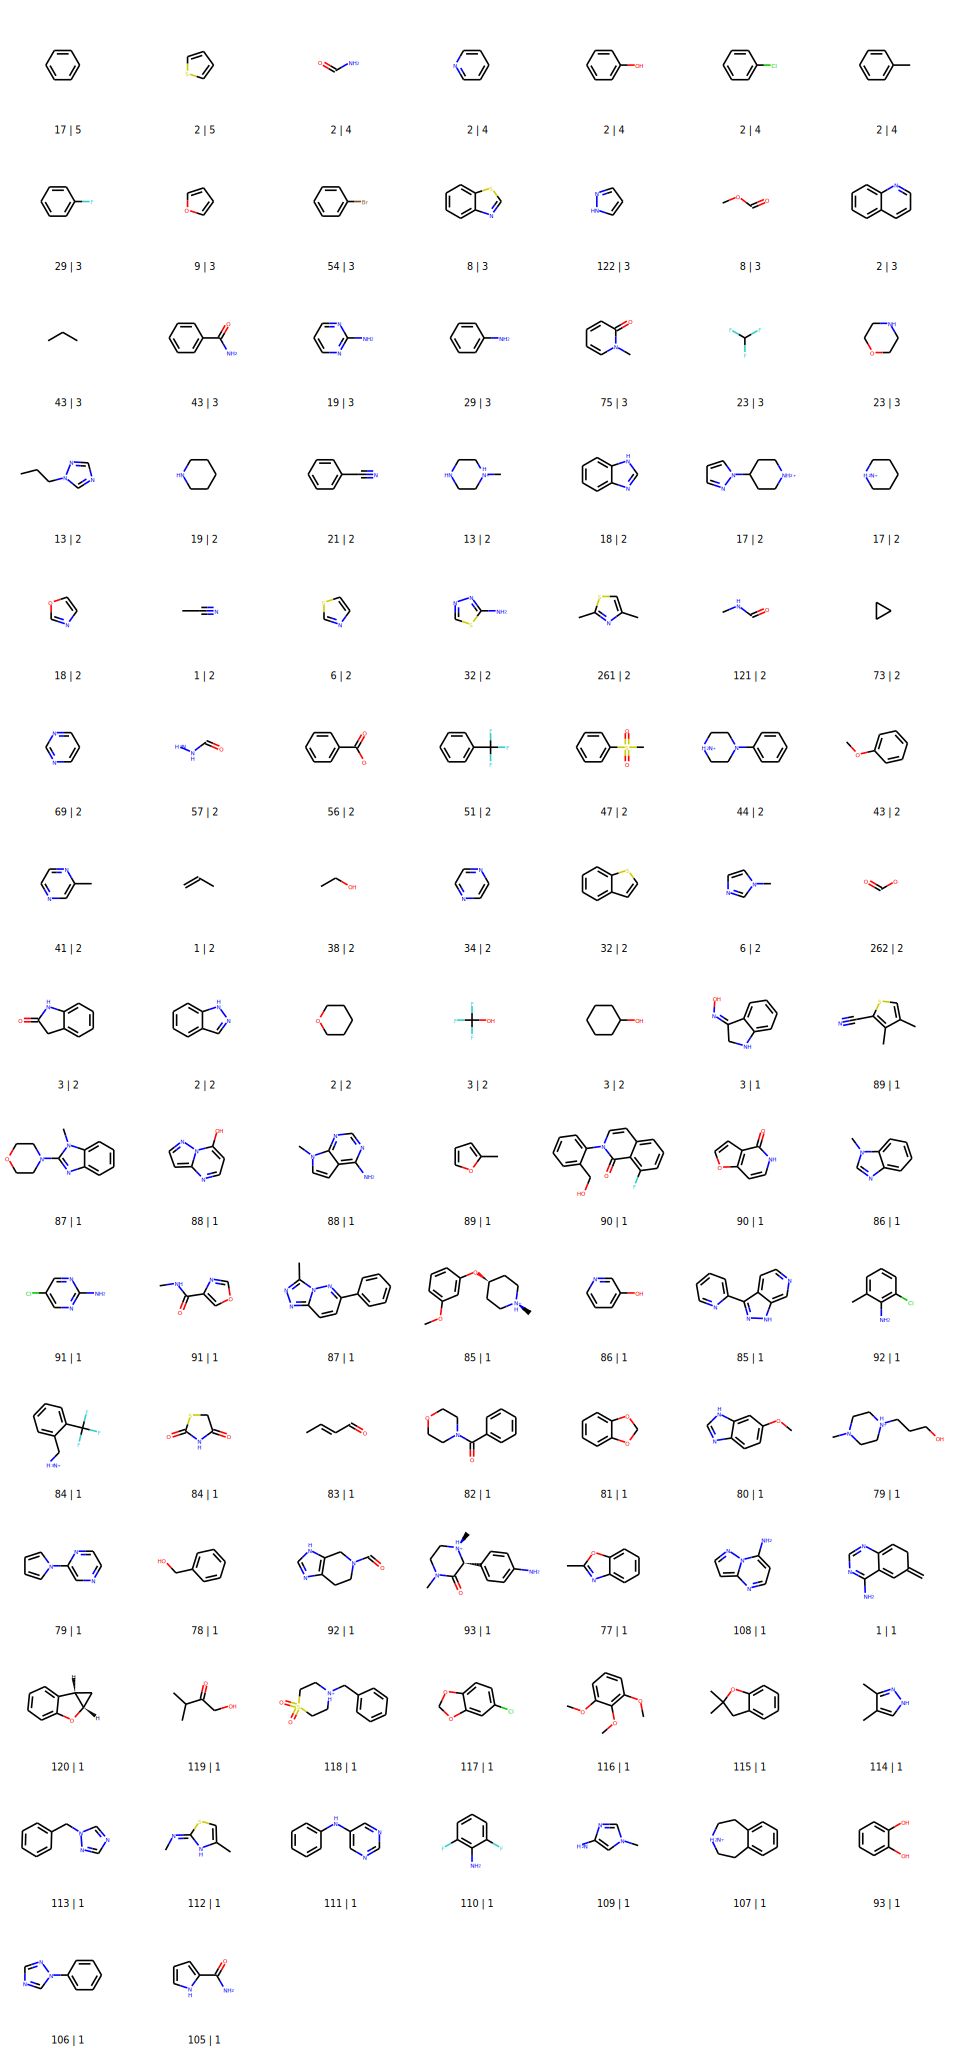

In [27]:
filters.plots.draw_clusters(clustered_fragments_reduced)

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
0,32,CC#N,2,,1,2,"[FP, GA]"
1,50,C=CC,2,,1,3,"[SE, GA]"
2,86,c1scc2c1OCCO2,1,,1,4,[SE]

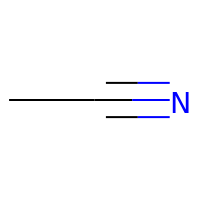
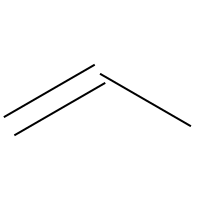
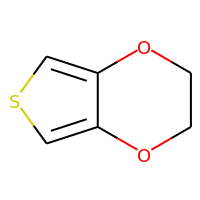

In [28]:
clustered_fragments_reduced.head(3)

Are there fragments appearing in all 6 subpockets?

In [29]:
clustered_fragments_reduced[clustered_fragments_reduced["fragment_count"]==6].shape

(0, 7)

In [30]:
clustered_fragments_reduced[clustered_fragments_reduced["fragment_count"]==6].head(3)

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets


Are there fragments appearing only in one subpocket?

In [31]:
clustered_fragments_reduced[clustered_fragments_reduced["fragment_count"]==1].shape

(486, 7)

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
2,86,c1scc2c1OCCO2,1,,1,4,[SE]
3,108,Cc1cccnc1,1,,1,5,[SE]
4,152,C=C1C=c2c(N)ncnc2=CC1,1,,1,6,[AP]

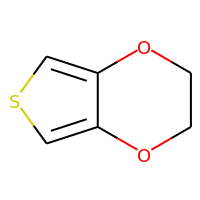
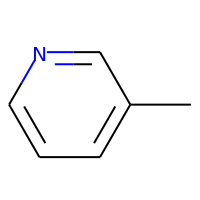
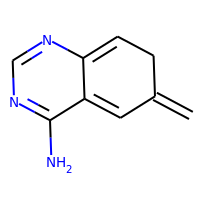

In [32]:
clustered_fragments_reduced[clustered_fragments_reduced["fragment_count"]==1].head(3)

### 3.3. Fragment library custom filtered

In [33]:
clustered_fragments_custom = filters.analysis.cluster_fragment_library(fragment_library_custom)

Number of molecules: 607
Threshold:  0.6
Number of clusters:  118
# Clusters with only 1 molecule:  56
# Clusters with more than 5 molecules:  27
# Clusters with more than 25 molecules:  3
# Clusters with more than 100 molecules:  0


Legend: cluster ID | fragment count


/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  warnings.warn(


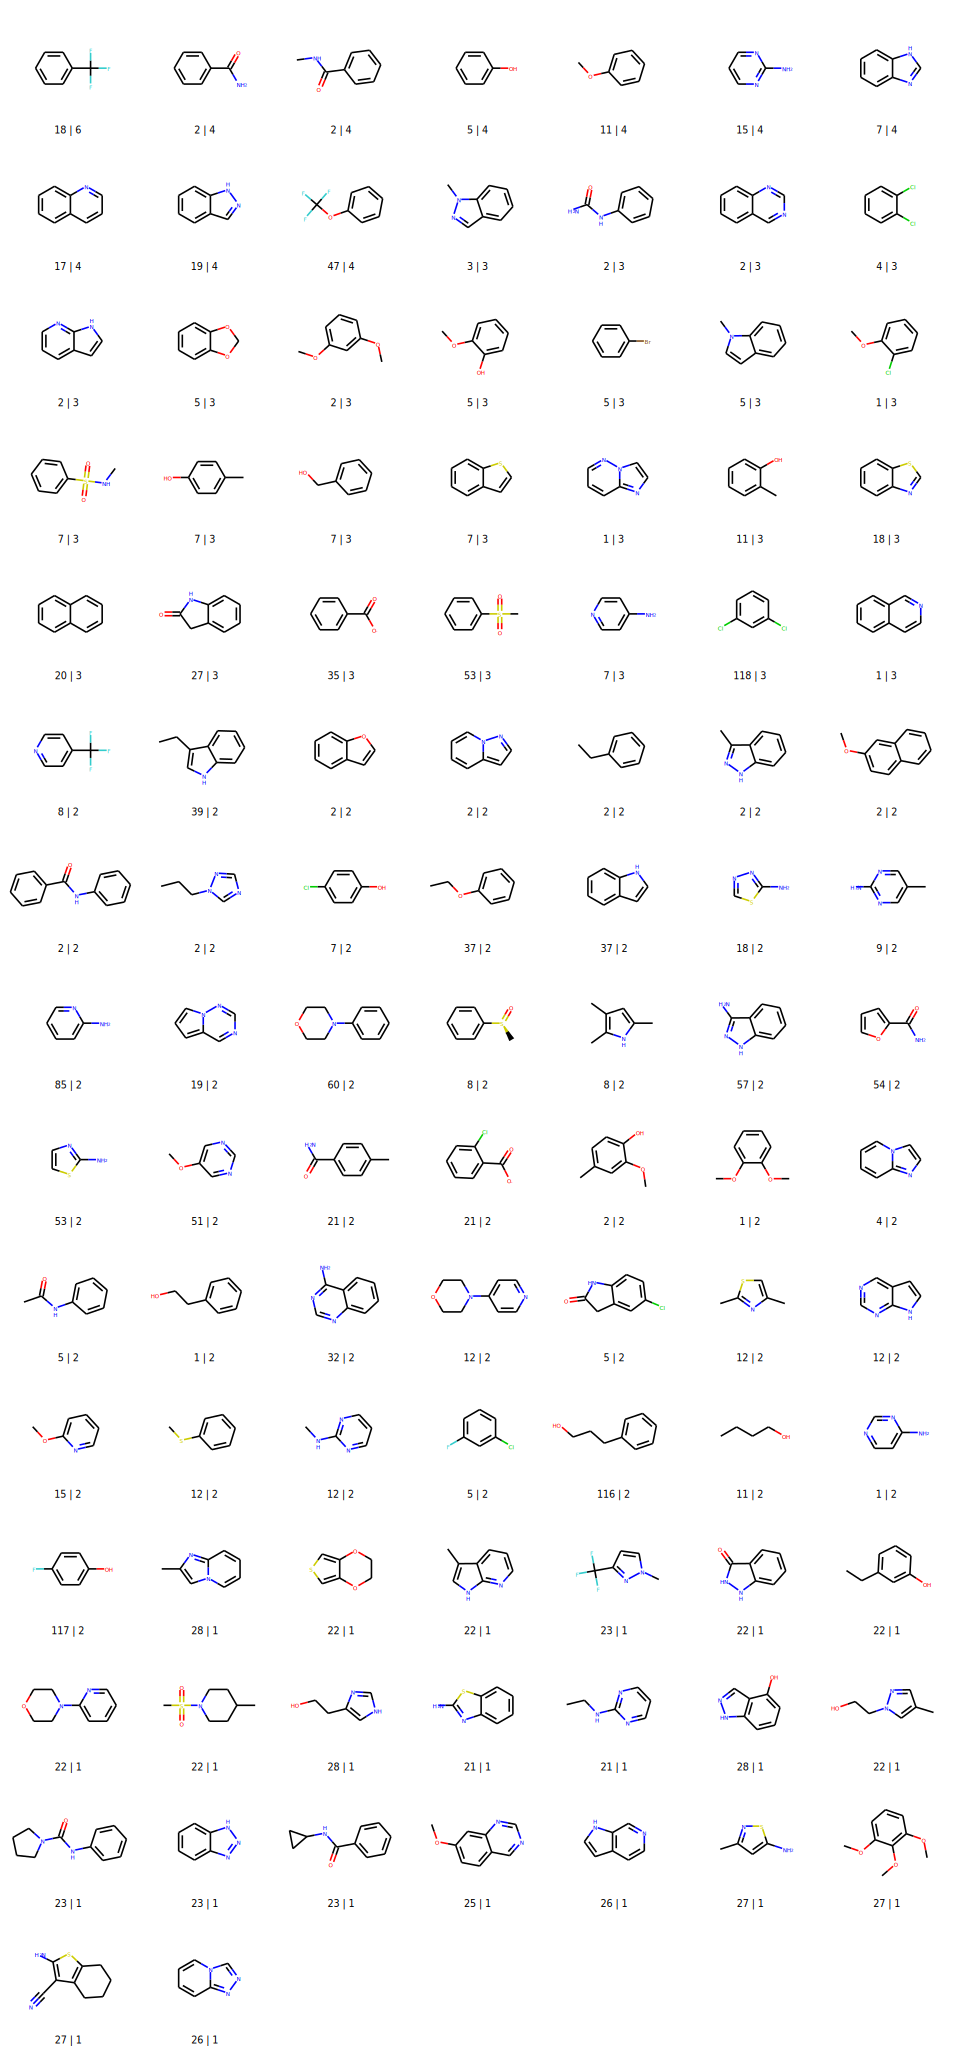

In [34]:
filters.plots.draw_clusters(clustered_fragments_custom)

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
0,18,COc1ccccc1Cl,3,,1,2,"[FP, SE, GA]"
1,19,c1cnn2ccnc2c1,3,,1,3,"[AP, FP, SE]"
2,20,c1ccc2cnccc2c1,3,,1,4,"[AP, FP, SE]"

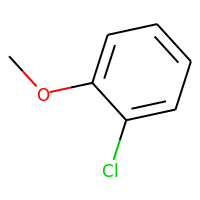
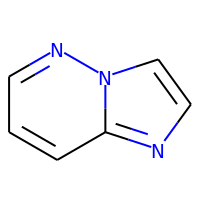
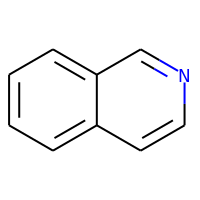

In [35]:
clustered_fragments_custom.head(3)

Are there fragments appearing in all 6 subpockets?

In [36]:
clustered_fragments_custom[clustered_fragments_custom["fragment_count"]==6].shape

(1, 7)

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
298,0,FC(F)(F)c1ccccc1,6,,18,2,"[AP, FP, SE, GA, B1, B2]"

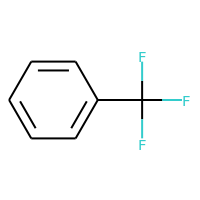

In [37]:
clustered_fragments_custom[clustered_fragments_custom["fragment_count"]==6]

Are there fragments appearing only in one subpocket?

In [38]:
clustered_fragments_custom[clustered_fragments_custom["fragment_count"]==1].shape

(404, 7)

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
6,90,Nc1c[nH]c2ncccc12,1,,1,8,[AP]
7,119,CCN1CCN(Cc2ccccc2)CC1,1,,1,9,[SE]
8,127,CCc1cc(F)ccc1OC,1,,1,10,[FP]

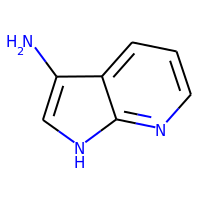
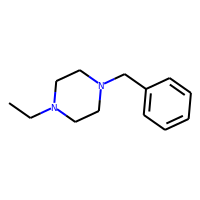
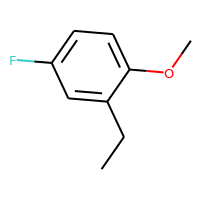

In [39]:
clustered_fragments_custom[clustered_fragments_custom["fragment_count"]==1].head(3)

### 3.4. Compare cluster sizes for all subsets

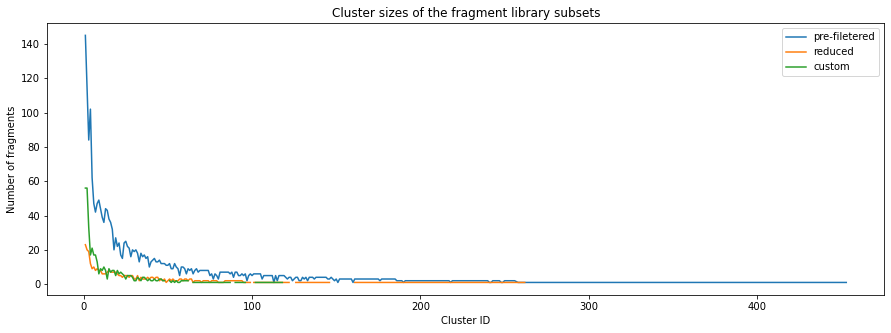

In [40]:
cluster_sizes = pd.DataFrame()
cluster_sizes["pre-filetered"] = clustered_fragments.groupby('cluster_id').size()
cluster_sizes["pre-filetered"].name = 'cluster_size'
cluster_sizes["reduced"] = clustered_fragments_reduced.groupby('cluster_id').size()
cluster_sizes["reduced"].name = "cluster_size"
cluster_sizes["custom"] = clustered_fragments_custom.groupby('cluster_id').size()
cluster_sizes["custom"].name = "cluster_size"

plt = cluster_sizes.plot(
    figsize=(15,5),
    title="Cluster sizes of the fragment library subsets",
    ylabel="Number of fragments",
    xlabel="Cluster ID"
)

### 3.5. Compare most common fragments in complete fragment library with most specific fragments in custom fragment library

Which of the most common fragments in the complete library are only seen in one subpocket?

In [41]:
from rdkit import Chem
from rdkit.Chem import Draw
def most_common_in_most_specific(fragment_library, clustered_fragments_subset, subpocket, top_x=50, num_subpockets=1):
    for i in range(num_subpockets,7,1):
        subset = clustered_fragments_subset[clustered_fragments_subset["fragment_count"]<=i]
        subset = subset[subset["subpockets"].astype(str).str.contains(subpocket)]
        if subset.empty:
            i = i + 1
        else:
            break
    most_common_frags = utils.get_most_common_fragments(
            fragment_library[subpocket],
            top_x=top_x,
        )
    most_common_frags.sort_values(by=['fragment_count'], ascending=False, inplace=True)

    most_common_in_subset = []
    legend_lst = []
    for _, row_common in most_common_frags.iterrows():
        for _, row_subset in subset.iterrows():
            if row_common["smiles"] == row_subset["smiles"]:
                most_common_in_subset.append(row_subset["smiles"])
                legend_lst.append(f'{row_subset["cluster_id"]} | {row_common["fragment_count"]}' )
    if most_common_in_subset:
        print(f'Legend: cluster ID | fragment count inside %s in complete fragment library' %subpocket)
        img = Draw.MolsToGridImage(
            [Chem.MolFromSmiles(smiles) for smiles in most_common_in_subset],
            legends = legend_lst,
            molsPerRow=10,
        )
        return img
    else:
        print("No fragment was found in both subsets")
    

Legend: cluster ID | fragment count inside AP in complete fragment library


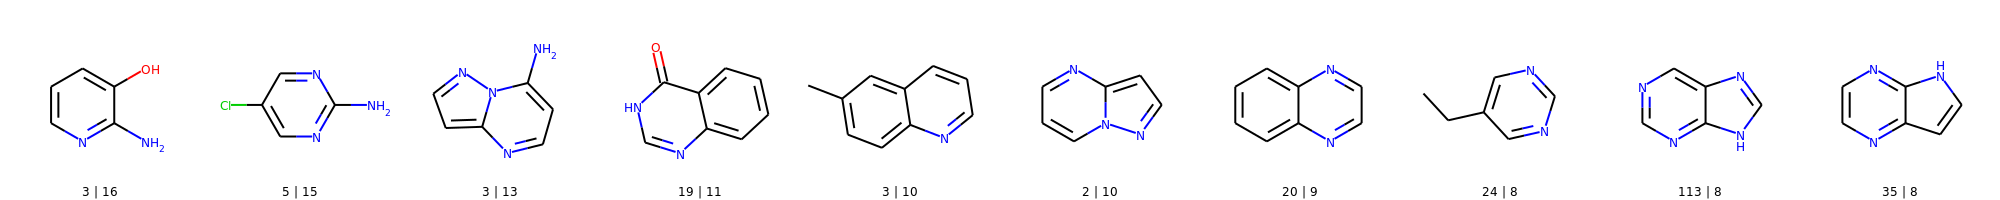

In [42]:
most_common_in_most_specific(fragment_library_orig, clustered_fragments_custom, "AP")

Legend: cluster ID | fragment count inside FP in complete fragment library


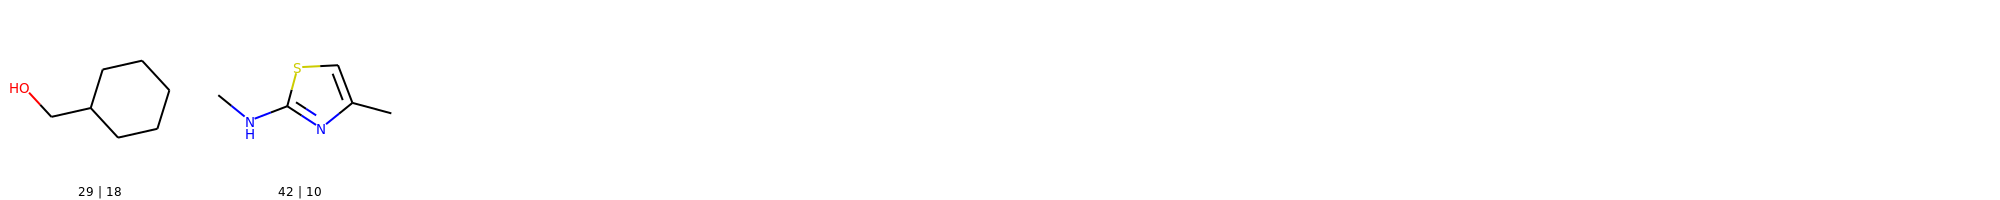

In [43]:
most_common_in_most_specific(fragment_library_orig, clustered_fragments_custom, "FP") 

Legend: cluster ID | fragment count inside GA in complete fragment library


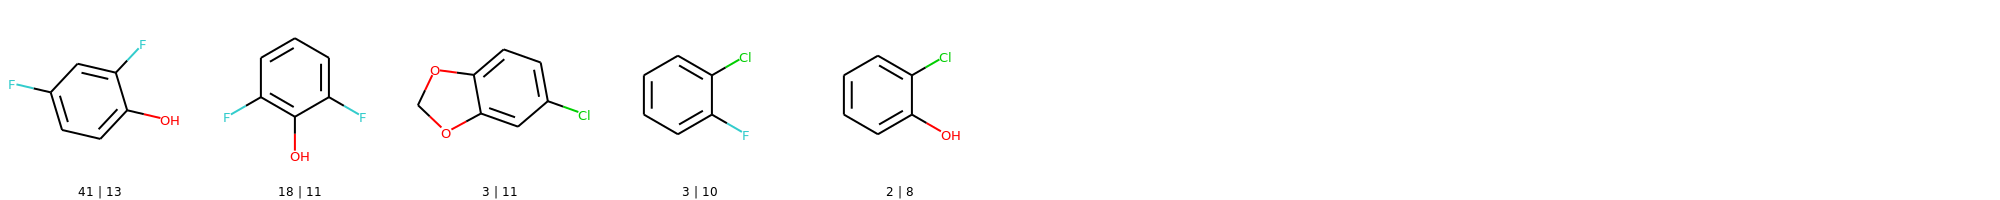

In [44]:
most_common_in_most_specific(fragment_library_orig, clustered_fragments_custom, "GA")

Legend: cluster ID | fragment count inside SE in complete fragment library


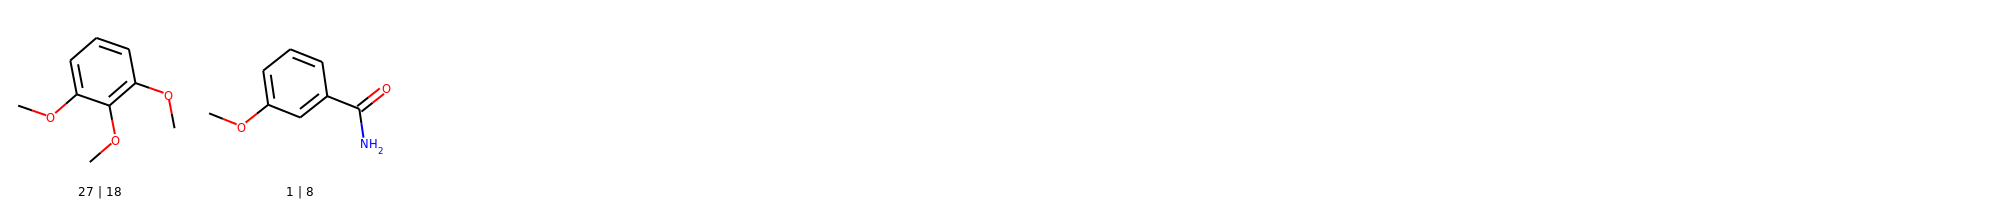

In [45]:
most_common_in_most_specific(fragment_library_orig, clustered_fragments_custom, "SE")

Legend: cluster ID | fragment count inside B1 in complete fragment library


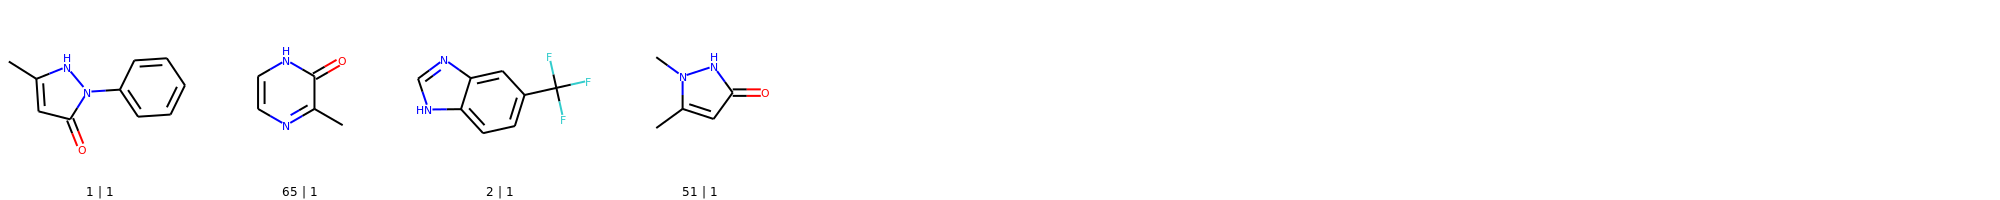

In [46]:
most_common_in_most_specific(fragment_library_orig, clustered_fragments_custom, "B1")

Legend: cluster ID | fragment count inside B2 in complete fragment library


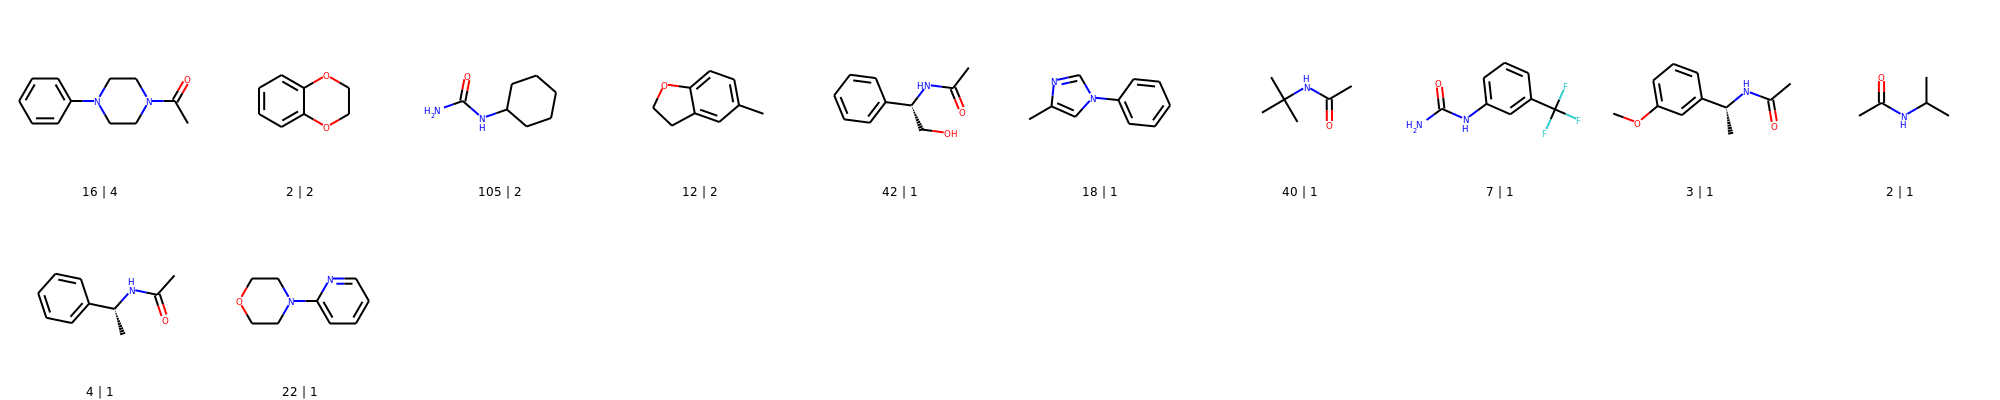

In [47]:
# no fragments occour only in B2
# function takes fragments that occour in two subsets
most_common_in_most_specific(fragment_library_orig, clustered_fragments_custom, "B2")

## 4. Connection frequecy between subpockets

Count the number of connections between the subpockets (dummy atoms pointing to adjacent subpockets) and calculate the frequency of each connection.

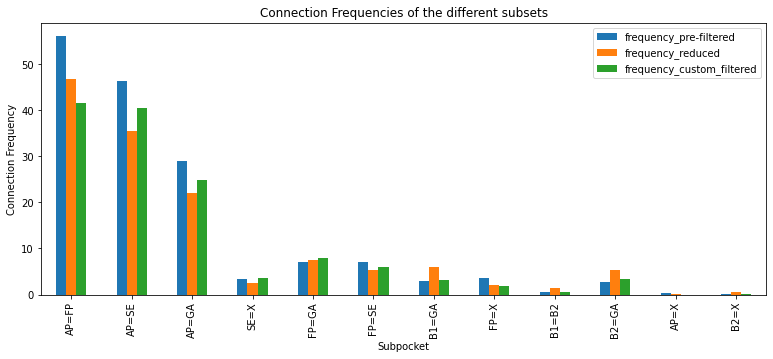

In [48]:
con_frequencies = filters.plots.connection_frequencies(fragment_library, fragment_library_reduced, fragment_library_custom)

In [49]:
con_frequencies

,count_pre-filtered,frequency_pre-filtered,count_reduced,frequency_reduced,count_custom-filtered,frequency_custom_filtered
AP=FP,1026,56.2,254,46.9,226,41.5
AP=SE,848,46.4,193,35.6,220,40.4
AP=GA,528,28.9,120,22.1,135,24.8
SE=X,63,3.4,13,2.4,19,3.5
FP=GA,129,7.1,41,7.6,43,7.9
FP=SE,128,7.0,29,5.4,32,5.9
B1=GA,54,3.0,32,5.9,17,3.1
FP=X,68,3.7,11,2.0,10,1.8
B1=B2,9,0.5,8,1.5,3,0.6
B2=GA,49,2.7,29,5.4,18,3.3


## 5. Fragment similarity per subpocket


Calculate the Tanimoto similarity for each fragment library subset.

In [50]:
similarities_per_subpocket = utils.get_fragment_similarity_per_subpocket(pd.concat(fragment_library))
similarities_per_subpocket_reduced = utils.get_fragment_similarity_per_subpocket(pd.concat(fragment_library_reduced))
similarities_per_subpocket_custom = utils.get_fragment_similarity_per_subpocket(pd.concat(fragment_library_custom))
mean_similarities = pd.concat(
    [
        similarities_per_subpocket.groupby('subpocket', sort=False).mean(),
        similarities_per_subpocket_reduced.groupby('subpocket', sort=False).mean(),
        similarities_per_subpocket_custom.groupby('subpocket', sort=False).mean(),
    ],
    axis=1,
)
mean_similarities.columns=["similarity_pre-filtered", "similarity_reduced", "similarity_custom"]
mean_similarities

,similarity_pre-filtered,similarity_reduced,similarity_custom
subpocket,,,
AP,0.140770,0.111311,0.158790
FP,0.089188,0.069282,0.102551
SE,0.102719,0.076425,0.136777
GA,0.104821,0.075186,0.155059
B1,0.074256,0.052510,0.144844
B2,0.091785,0.073320,0.134577


Plot the fragment similarity.

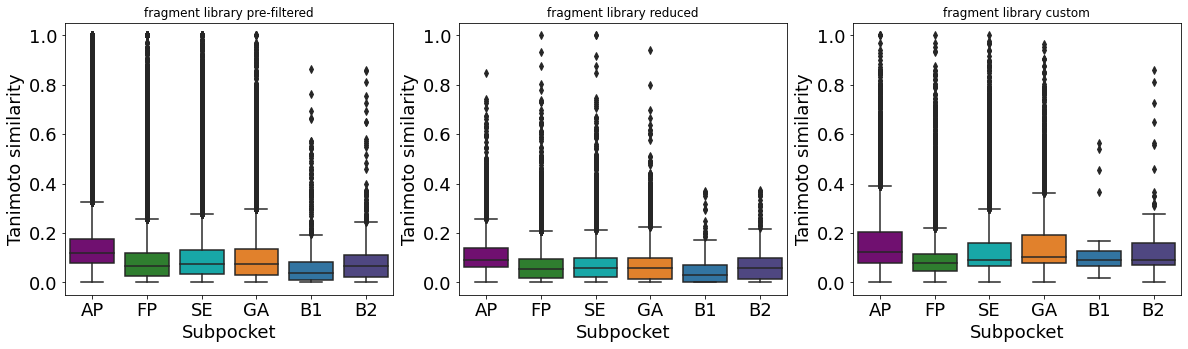

In [51]:
filters.plots.plot_fragment_similarity(
    [similarities_per_subpocket,
     similarities_per_subpocket_reduced,
     similarities_per_subpocket_custom],
    ["fragment library pre-filtered",
    "fragment library reduced",
    "fragment library custom"],
    'Subpocket'
)

## 6. Fragment properties 

Inspect the fragment properties in each subpocket, namely

    - Number of hyrogen bond donors (# HBD)
    - Number of hydrigen bond acceptors (# HBA)
    - Octanol-water partition coefficient (LogP)
    - Number of heavy atoms (# Heavy atoms)

* 6.1. For each library subset
* 6.2. For every custom filter step

### 6.1. For each library subset

 fragment library pre-filtered 


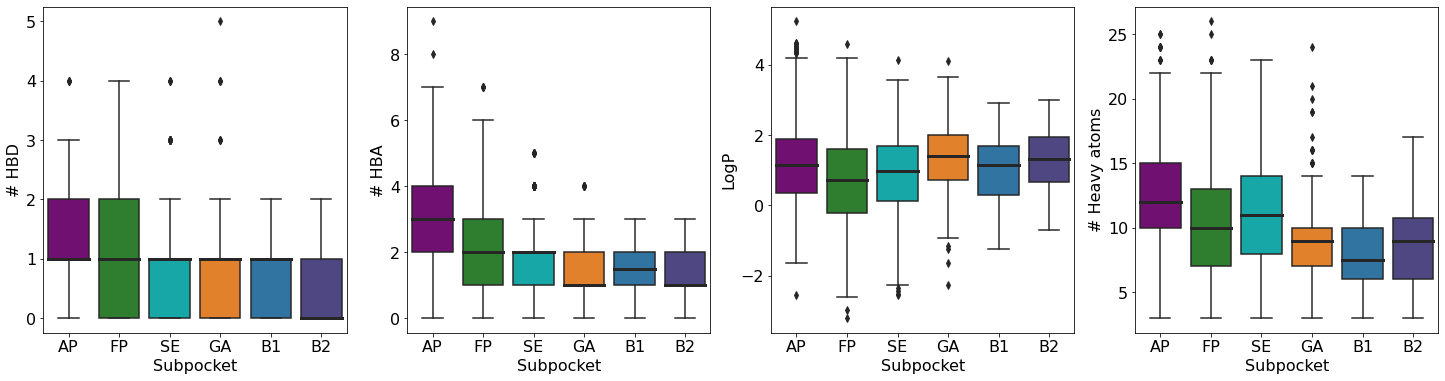

 fragment  library reduced 


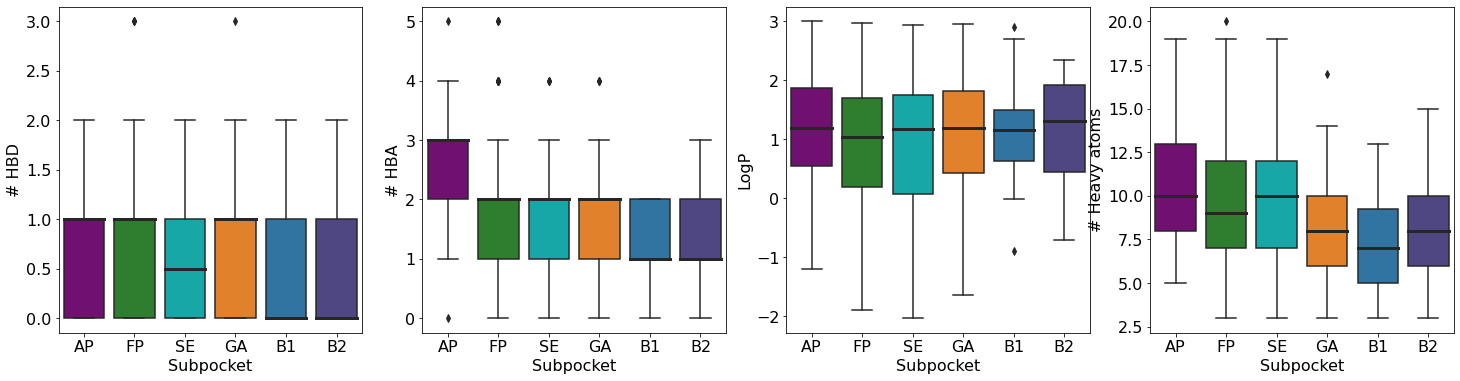

 fragment library custom 


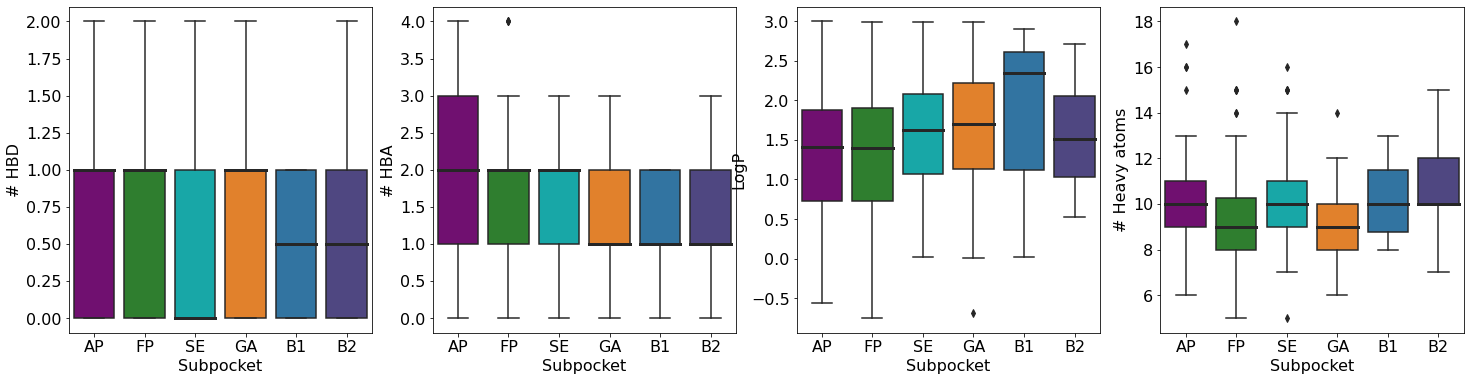

In [52]:
filters.analysis.get_descriptors(fragment_library, fragment_library_reduced, fragment_library_custom)

### 6.2. For every custom filter step

In [53]:
filter_results = pd.read_csv(PATH_DATA_CUSTOM / "custom_filter_results.csv")
fragment_library_filter_res, bool_keys = filters.analysis.filter_res_in_fraglib(fragment_library, filter_results)

 pre-filtered 


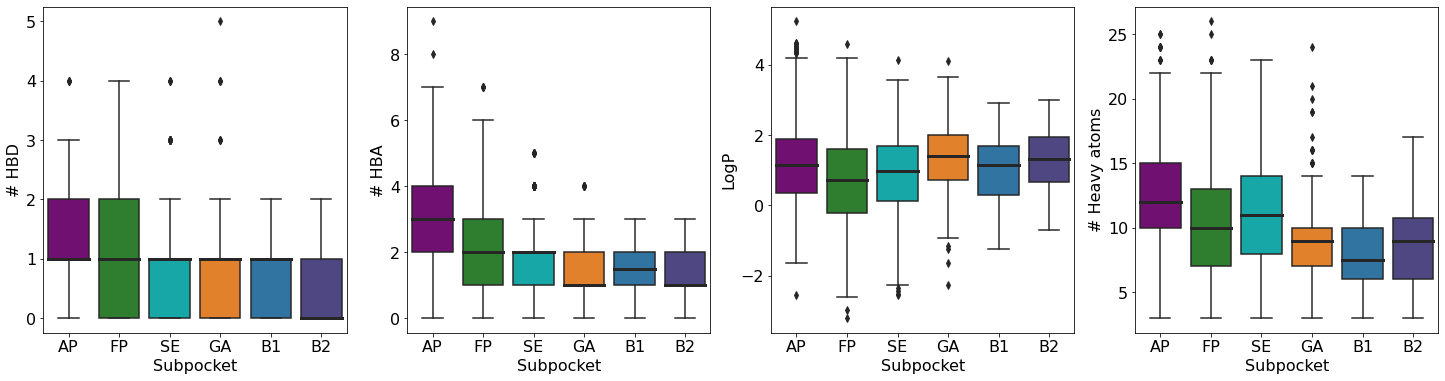

 bool_reduced 


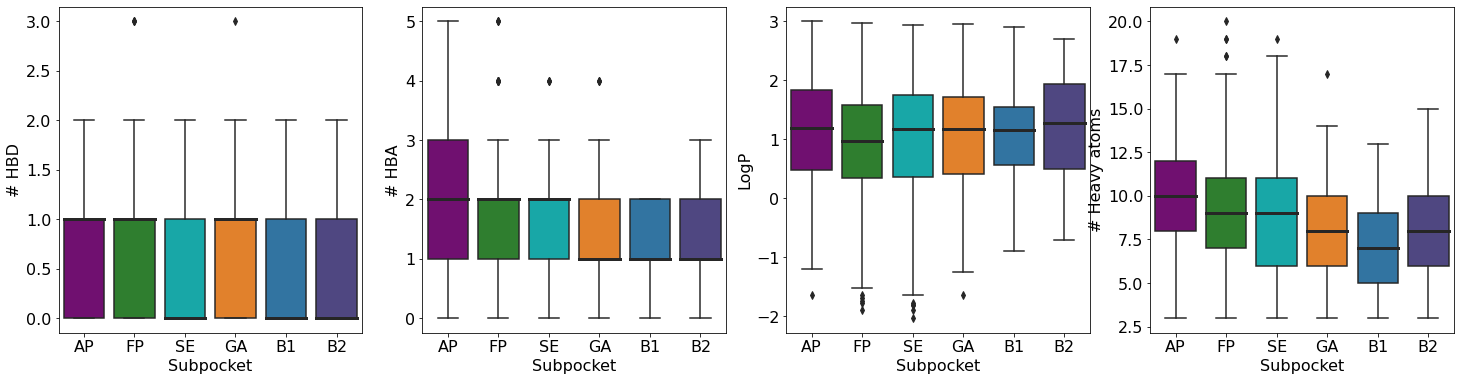

 bool_custom 


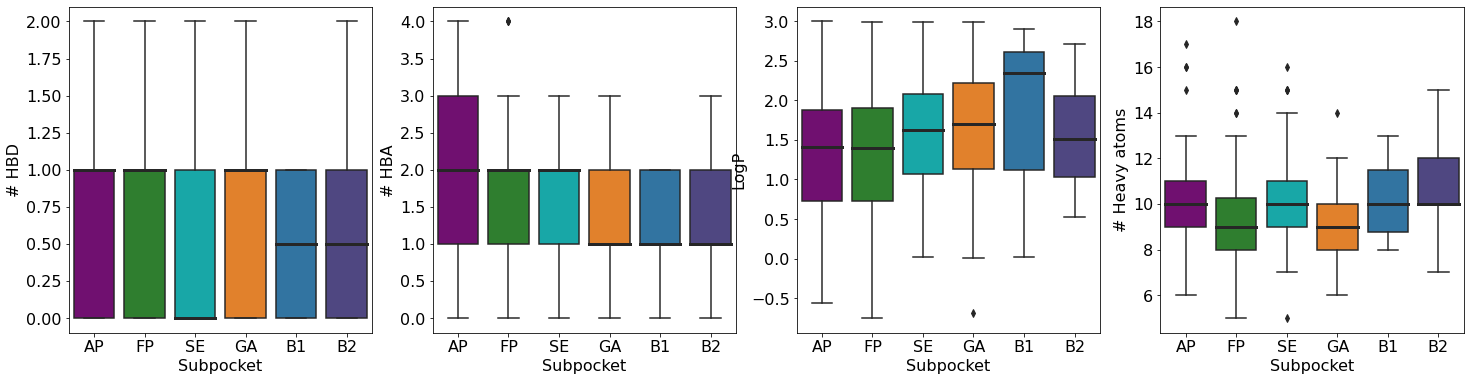

 bool_pains 


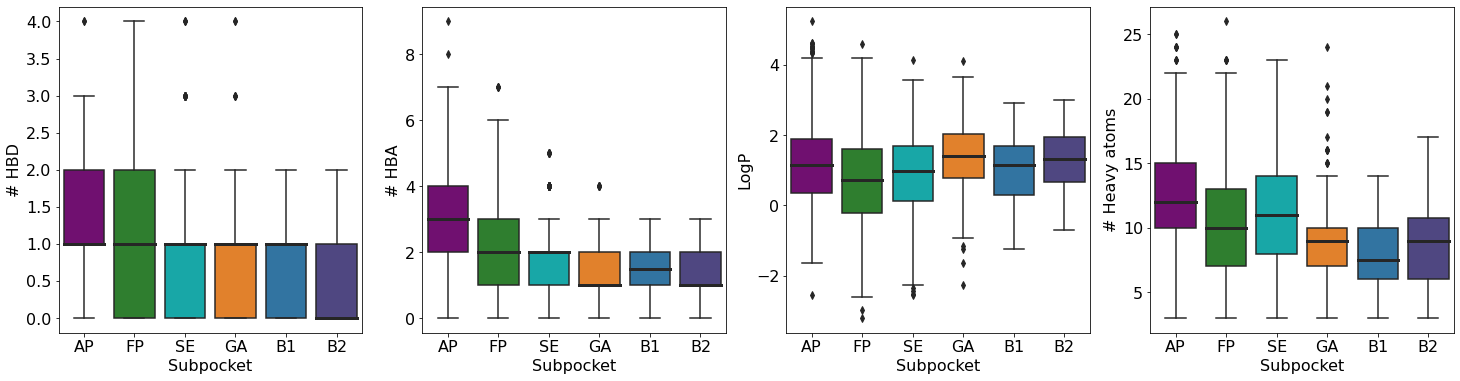

 bool_brenk 


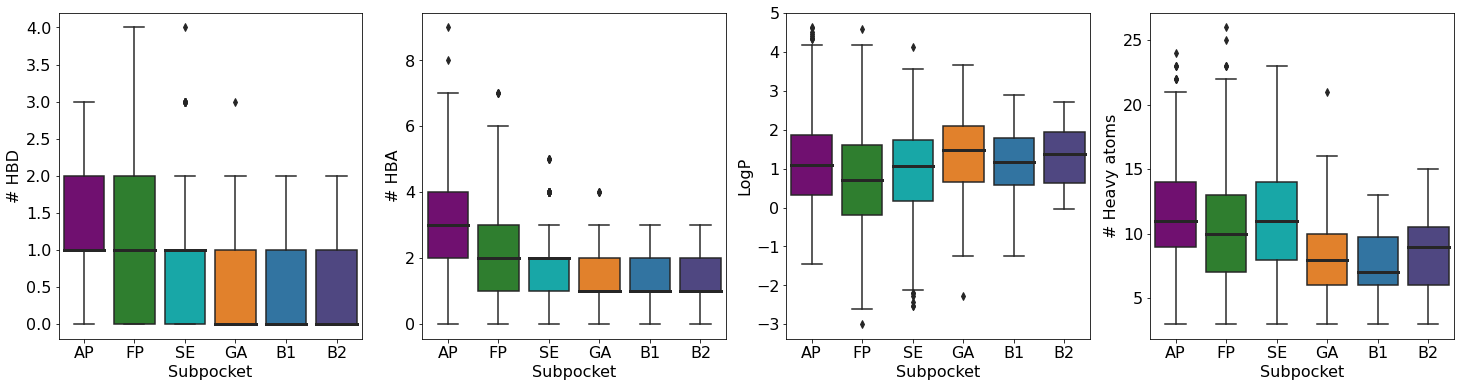

 bool_ro3 


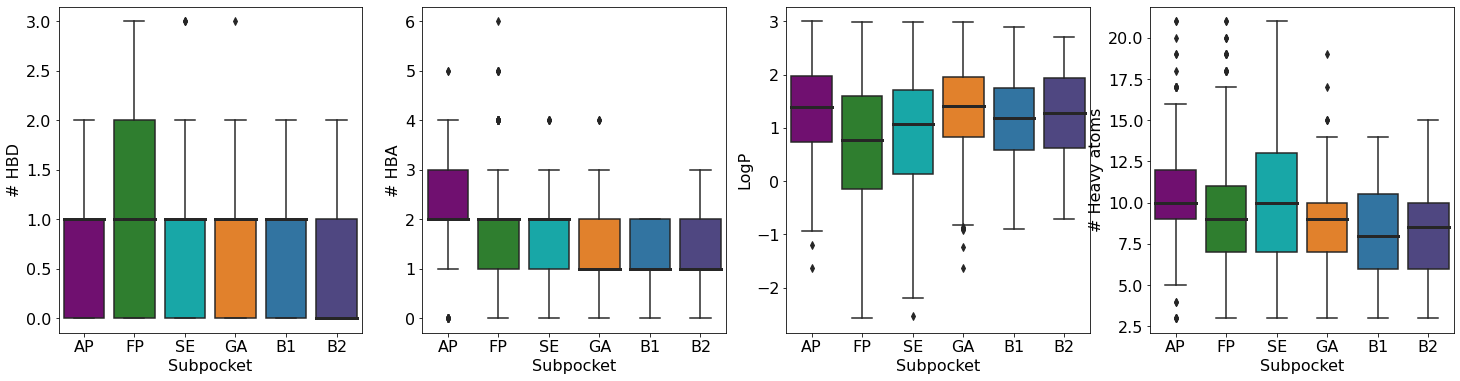

 bool_qed 


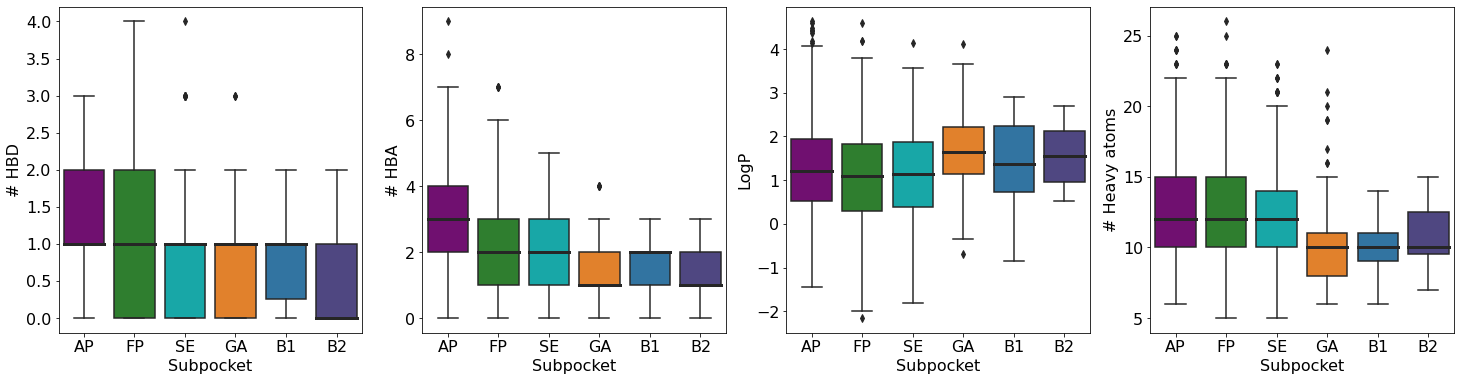

 bool_bb 


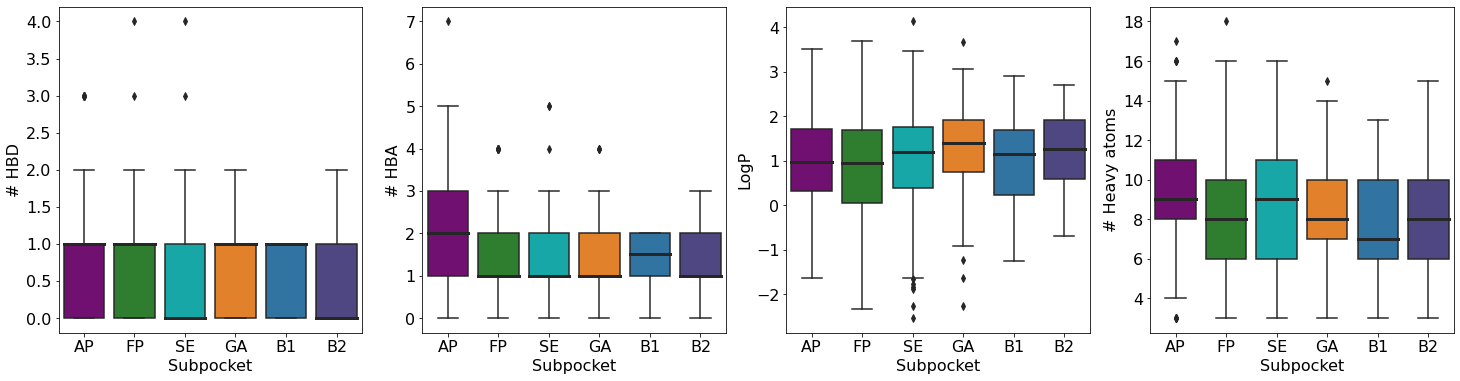

 bool_syba 


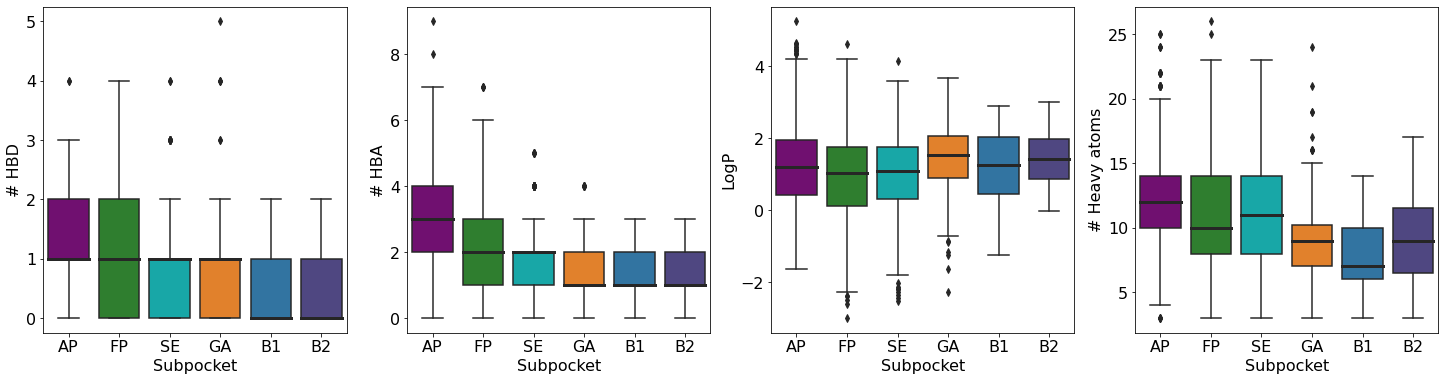

 bool_retro 


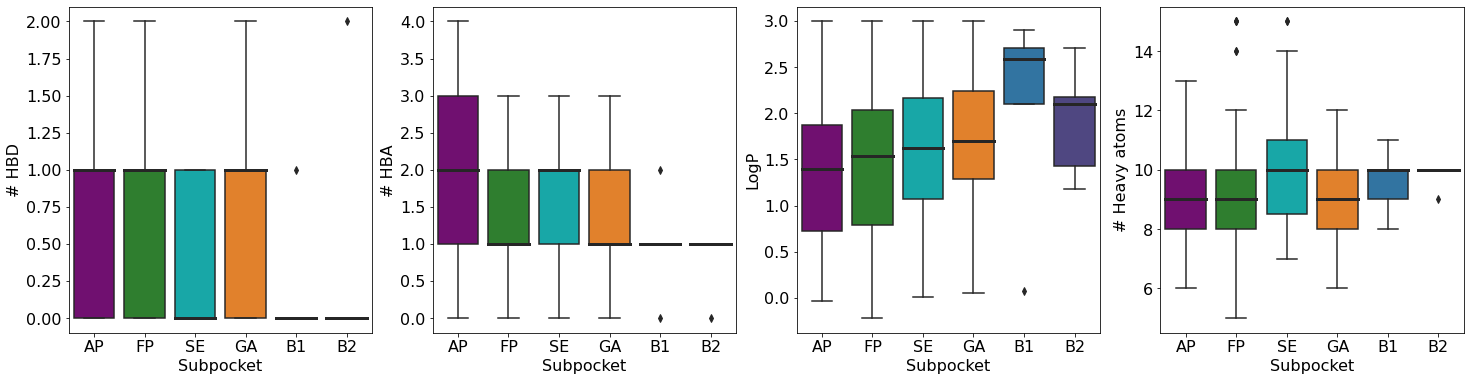

In [54]:
descriptors = filters.analysis.get_descriptors_filters(fragment_library_filter_res, bool_keys)

## 7. Development of number of fragments per subpocket during custom filtering

Inspect the number of fragments filtered out by each custom filtering step

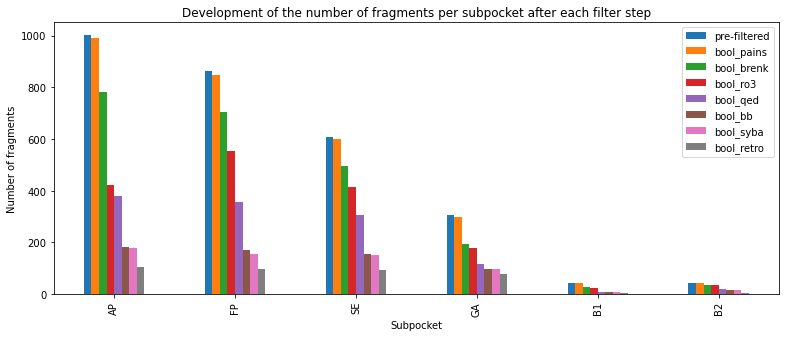

In [55]:
update_results = filters.plots.num_frags_development(filter_results)

In [56]:
update_results

,pre-filtered,bool_pains,bool_brenk,bool_ro3,bool_qed,bool_bb,bool_syba,bool_retro
AP,1001,990,781,422,379,181,179,107
FP,864,847,704,552,357,172,156,97
SE,607,599,495,414,308,154,150,95
GA,306,300,195,179,116,98,96,79
B1,42,42,26,23,10,8,8,5
B2,42,42,36,35,19,18,18,5
